# Masterthesis
#### Julian Jetz

In [1]:
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from scipy import stats
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from currency_converter import CurrencyConverter
from datetime import date

In [2]:
na_values = ['nan', 'N/A', 'NaN', 'NaT']

In [3]:
def get_merged_csv(flist, **kwargs):
    return pd.concat([pd.read_csv(f, **kwargs) for f in flist], ignore_index=True)

In [4]:
df = get_merged_csv(glob.glob('csvfiles/*.csv'), na_values=na_values, index_col=False, dtype = {"TYPE" : "str", "TYPEQ" : "str", "TYPTRK" : "str", "WEATHER" : "str", "VISIBLTY" : "str"})
df.shape[0]

/Users/julianjetz/anaconda3/envs/masterthesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (119) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/julianjetz/anaconda3/envs/masterthesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (119,128,129,130,131,132,133,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/julianjetz/anaconda3/envs/masterthesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,27,41,119,125,126,127,128,129,130,131,132,133,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


62846

In [5]:
def getEuro(damage, year, month, day):
    c = CurrencyConverter(fallback_on_missing_rate=True)
    damage=c.convert(damage, 'USD', 'EUR', date=date(year, month, day))
    return damage

#### Schaden in Euro umwandeln

In [6]:
#df['ACCDMG'] = df.apply(lambda row : getEuro(row['ACCDMG'], row['YEAR4'], row['MONTH'], row['DAY']), axis=1)

In [7]:
def isSerious(accdmg, killed, injured):
    type="Not Significant"
    # killed=row['RREMPKLD']+row['PASSKLD']+row['OTHERKLD']
    # injured=row['RREMPINJ']+row['PASSINJ']+row['OTHERINJ']
    if accdmg>=150000 or injured > 0 or killed > 0:
        type="Significant"
        if accdmg>=2000000 or injured >= 5 or killed > 0:
            type="Serious"
    return type

#### Bestimmung der Schwere des Unfalls (Nicht Signifikant, Signifikant und Schwer)

In [8]:
df['ACCTYPE'] = df.apply(lambda row : isSerious(row['ACCDMG'],row['RREMPKLD'] + row['PASSKLD'] + row['OTHERKLD'],row['RREMPINJ'] + row['PASSINJ'] + row['OTHERINJ']), axis=1)

*Umwandlung Monat zu Jahreszeiten*
*TODO*

In [ ]:
df['ACCTYPE'].unique()

In [10]:
pd.set_option('display.max_columns', 500)
df.head(50)

,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,RR3,INCDTNO3,DUMMY1,GXID,YEAR,MONTH,DAY,TIMEHR,TIMEMIN,AMPM,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,DIVISION,STATION,MILEPOST,STATE,TEMP,VISIBLTY,WEATHER,TRNSPD,TYPSPD,TRNNBR,TRNDIR,TONS,TYPEQ,EQATT,TRKNAME,TRKCLAS,TRKDNSTY,TYPTRK,RRCAR1,CARNBR1,POSITON1,LOADED1,RRCAR2,CARNBR2,POSITON2,LOADED2,HEADEND1,MIDMAN1,MIDREM1,RMAN1,RREM1,HEADEND2,MIDMAN2,MIDREM2,RMAN2,RREM2,LOADF1,LOADP1,EMPTYF1,EMPTYP1,CABOOSE1,LOADF2,LOADP2,EMPTYF2,EMPTYP2,CABOOSE2,EQPDMG,TRKDMG,CAUSE,CAUSE2,CASKLDRR,CASINJRR,CASKLD,CASINJ,ACCAUSE,ACCTRK,ACCTRKCL,HIGHSPD,ACCDMG,DUMMY2,STCNTY,TOTINJ,DUMMY3,TOTKLD,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,DUMMY4,TYPRR,DUMMY5,RRDIV,METHOD,NARRLEN,DUMMY6,YEAR4,RREMPKLD,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,COUNTY,CNTYCD,ALCOHOL,DRUG,DUMMY7,PASSTRN,SSB1,SSB2,NARR1,NARR2,NARR3,NARR4,NARR5,NARR6,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV,ACCTYPE
0,1,3,ATK,067298,NaN,NaN,NaN,NaN,1,3,UP,0301RS044,NaN,NaN,1,3,25,8,31,AM,01,0,0,0,0,WSD,OAKLAND,0005.0,6,60,2,1,2,E,231,4.0,0,8,Y,SHOP SIDE,1,000000,2,ATK,281,2,NaN,NaN,NaN,0,NaN,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7000,0,T108,NaN,0,0,0,0,T108,2.0,1,2,7400,NaN,06C001,0,0,0,2.0,0.0,1.0,1.0,1.0,10.0,1.0,10.0,1,7,NaN,1L,NaN,NaN,N,231,NaN,2001,0,0,0,0,0,0,ALAMEDA,1.0,NaN,NaN,NaN,N,NaN,NaN,UNITS 231-281(BACK TO BACK) WERE COMING INTO ...,ECENTLY REPAIRED SWITCH PLATE AND DERAILED. TH...,AT IT WAS TOO SHARP OF A CURVE.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Significant
1,1,3,ATK,067334,NaN,NaN,NaN,NaN,1,3,ATK,067334,NaN,NaN,1,3,31,4,0,AM,11,0,0,0,0,NED,SPRINGFIELD,0061.2,25,31,4,1,0,E,286,1.0,0,8,N,6,1,000.00,2,ATK,286,1,NaN,NaN,NaN,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25000,0,E79L,NaN,0,0,0,0,E79L,2.0,1,0,25000,NaN,25C013,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1,1,NaN,1L,NaN,NaN,N,95,NaN,2001,0,0,0,0,0,0,HAMPDEN,13.0,NaN,NaN,NaN,N,NaN,NaN,"ENGINE 286 CAUGHT FIRE AT THE SPRINGFIELD, MA ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Significant
2,1,3,ATK,067292,NaN,NaN,NaN,NaN,1,3,ATK,067292,NaN,NaN,1,3,29,3,50,PM,01,0,0,0,0,WTR,CHICAGO,0000.5,17,38,2,2,5,R,4,1.0,0,2,Y,4/28,1,000000,1,AMT,44834,5,Y,NaN,NaN,0,NaN,4,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,2,0,0,0,7500,500,E79L,NaN,0,0,0,0,E79L,1.0,1,5,8000,NaN,17C031,0,0,0,1.0,1.0,0.0,1.0,4.0,47.0,NaN,NaN,1,4,NaN,1L,NaN,NaN,F,387,NaN,2001,0,0,0,0,0,0,COOK,31.0,NaN,NaN,NaN,Y,NaN,NaN,TRAIN NO.#4 WITH ENGS 83/11/90/44 AND 11 CARS ...,KING A SHOVING MOVE ONTO TRACK 28. THE DERAIL...,DEADHEADING AMFLEET CAR 44834 LOCATED DIRECTLY...,Y FOUR P42 LOCOMOTIVES SHOVING TRAIN AGAINST A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Significant
3,1,3,ATK,067665,NaN,NaN,NaN,NaN,1,3,ATK,067665,NaN,NaN,1,3,29,4,57,AM,01,0,0,0,0,MID,PHILADELPHIA,0001.5,42,40,4,2,4,E,624,2.0,0,2,Y,30 TRACK,1,000000,2,ATK,48223,13,N,NaN,NaN,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,2,0,10000,0,H303,NaN,0,0,0,0,H303,2.0,1,4,10000,NaN,42C101,0,0,0,1.0,0.0,1.0,1.0,6.0,57.0,6.0,57.0,1,2,NaN,1L,NaN,NaN,L,122,NaN,2001,0,0,0,0,0,0,PHILADELPHIA,101.0,0.0,0.0,NaN,N,NaN,NaN,WHILE SHOVING TRAIN 624 SOUTH ON #30 TRACK AT ...,AND 2 CARS DERAILED .,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Significant
4,1,3,ATK,066864,NaN,NaN,NaN,NaN,1,3,UP,0301LA069,NaN,NaN,1,3,4,7,10,PM,09,0,0,0,0,WSD,SANTA BARBARA,0370.4,6,48,4,3,45,R,786,3.0,0,2,Y,MAIN,3,000000,1,ATK,462,1,NaN,NaN,NaN,0,NaN,1,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,15972,0,M404,NaN,0,0,0,0,M404,1.0,3,45,15972,NaN,06C083,0,0,0,1.0,0.0,1.0,1.0,8.0,50.0,9.0,5.0,1,7,NaN,1L,NaN,NaN,K,66,NaN,2001,0,0,0,0,0,0,SANTA BARBARA,83.0,NaN,NaN,NaN,Y,NaN,NaN,TRAIN 786 WAS STRUCK BY A FALLING TREE SOUTH O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

#### Entfernung aller n/a Werte

In [12]:
df=df.dropna(subset=['YEAR4', 'MONTH', 'TYPE', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOADF2', 'LOADP2', 'EMPTYF2', 'EMPTYP2','TONS', 'TYPEQ', 'TYPTRK', 'TEMP', 'VISIBLTY', 'WEATHER', 'COUNTY', 'TRNSPD', 'ACCDMG', 'ACCAUSE']);

df.shape[0]


58228

#### Ausreißer entfernen

In [13]:
std_dev = 3
df = df[(np.abs(stats.zscore(df[['LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOADF2', 'LOADP2', 'EMPTYF2', 'EMPTYP2','TONS', 'TEMP', 'ACCDMG']])) < float(std_dev)).all(axis=1)]

#### [Adam Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) <br>
Die Adam-Optimierung ist eine stochastische Gradientenabsenkungsmethode, die auf einer adaptiven Schätzung von Momenten erster und zweiter Ordnung basiert. Das Verfahren ist "recheneffizient, hat wenig Speicherbedarf, ist invariant gegenüber der diagonalen Neuskalierung von Gradienten und eignet sich gut für Probleme, die in Bezug auf Daten/Parameter groß sind".
[Arxiv](https://arxiv.org/pdf/1412.6980.pdf)<br><br>
*Learning rate:* In der maschinellen Lern- und Statistiktechnik ist die Lernrate ein Tuningparameter in einem Optimierungsalgorithmus, der die Schrittweite bei jeder Iteration bestimmt und sich dabei auf ein Minimum einer Verlustfunktion zubewegt. Da sie beeinflusst, inwieweit neu gewonnene Informationen alte Informationen übersteuern, stellt sie metaphorisch die Geschwindigkeit dar, mit der ein maschinelles Lernmodell "lernt". Bei der Festlegung einer Lernrate gibt es einen Kompromiss zwischen der Konvergenzrate und der Überschreitung. Während die Richtung zum Minimum in der Regel aus dem Gradienten der Verlustfunktion bestimmt wird, bestimmt die Lernrate, wie groß ein Schritt in diese Richtung ist.Eine zu hohe Lernrate führt dazu, dass der Lernsprung über Minima hinausgeht, aber eine zu niedrige Lernrate dauert entweder zu lange, um sich zu konvergieren oder in einem unerwünschten lokalen Minimum stecken zu bleiben.
##### TODO: Adaptive Learning rate implementieren

In [14]:
opti = tf.optimizers.Adam(learning_rate = 0.01)

#### [Nadam Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Nadam?authuser=2&hl=vi&version=stable)
[Incorporating Nesterov Momentum into Adam](http://cs229.stanford.edu/proj2015/054_report.pdf)

In [15]:
# opti = tf.optimizers.Nadam(learning_rate = 0.01)

#### [Adagrad Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adagrad?hl=vi&authuser=2&version=stable)
Adagrad ist ein Optimierer mit parameter-spezifischen Lernraten, die angepasst werden, je nachdem, wie häufig ein Parameter während des Trainings aktualisiert wird. Je mehr Updates ein Parameter erhält, desto kleiner sind die Updates. [Adaptive Subgradient Methods for Online Learning and Stochastic Optimization](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf)

In [16]:
# opti = tf.optimizers.Adagrad(learning_rate = 0.01)

#### [Adamax Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adamax?hl=vi&authuser=2&version=stable)
Adamax ist eine Variante von Adam, die auf der Unendlichkeitsnorm basiert. Adamax ist Adam manchmal überlegen, besonders bei Modellen mit Einbettungen. [Arxiv](https://arxiv.org/pdf/1412.6980.pdf)

In [17]:
# opti = tf.optimizers.Adamax(learning_rate = 0.01)

## Complete regression model

Festlegen der abhängigen Variablen X und der vorherzusagenden Variable y

In [18]:
x_data = df[['YEAR4', 'MONTH', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOADF2', 'LOADP2', 'EMPTYF2', 'EMPTYP2','TONS', 'TEMP', 'TRNSPD', 'ACCAUSE', 'TYPE', 'TYPEQ', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'COUNTY']]
y = df['ACCDMG']

In [19]:
#scaler = MinMaxScaler()
#x_data = pd.DataFrame(scaler.fit_transform(x_data), columns=x_data.columns, index=x_data.index)

In [20]:
#cause_dummies= pd.get_dummies(df['ACCAUSE'], prefix='cause')
#x_data = pd.concat([x_data, df[['ACCAUSE', 'TYPE', 'TYPEQ', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'COUNTY']], axis=1)

In [21]:
x_data.describe(include='all')

,YEAR4,MONTH,LOADF1,LOADP1,EMPTYF1,EMPTYP1,LOADF2,LOADP2,EMPTYF2,EMPTYP2,TONS,TEMP,TRNSPD,ACCAUSE,TYPE,TYPEQ,TYPTRK,VISIBLTY,WEATHER,COUNTY
count,50497.000000,50497.000000,50497.000000,50497.000000,50497.000000,50497.000000,50497.000000,50497.0,50497.000000,50497.0,50497.000000,50497.000000,50497.000000,50497,50497,50497,50497,50497,50497,50497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370,13,14,4,4,6,1430
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H702,01,1,2,2,1,COOK
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2720,30205,21121,29947,24458,33642,2278
mean,2008.169535,6.426184,27.459473,0.067469,13.679427,0.010416,1.657425,0.0,0.751193,0.0,2925.047349,58.974375,10.236351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.584459,3.416471,31.189223,0.531582,20.761844,0.151469,2.576556,0.0,1.569157,0.0,3984.404075,21.569836,13.554121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-7.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2004.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,42.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2007.000000,6.000000,16.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.0,930.000000,60.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,9.000000,44.000000,0.000000,20.000000,0.000000,3.000000,0.0,1.000000,0.0,4815.000000,75.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
y.describe(include='all')

count    5.049700e+04
mean     6.931486e+04
std      1.354330e+05
min      0.000000e+00
25%      1.429500e+04
50%      2.584700e+04
75%      6.095300e+04
max      1.539961e+06
Name: ACCDMG, dtype: float64

In [23]:
y.sample(50)

5654      62205
37949     38735
23571     13632
47493     11647
286       10183
28946     48576
46133     29483
27220     19230
41074     16623
37559     21982
47061     19600
36273     10889
18196     35850
23301     16100
48707     29818
32603     18895
33998     65457
51092    142033
33528     18820
51499     42805
20102     60000
47978    167898
19528     66259
35773     22007
59666     84301
15059     11402
19775    117000
54067     12191
59614     13763
38774     10000
44783     15000
14696      7316
47763     23244
34605     13592
48848     23507
22665     22056
1947      26500
61484     26283
12495     18600
51111     33968
16655      8454
31834     13284
15307     17495
28633      7063
61572     12661
17943     63929
20485     99445
45851     39593
6078      65000
31420      7800
Name: ACCDMG, dtype: int64

Aufteilen der Daten in Train und Test Datensatz

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3)

#### Festlegen der numerischen Merkmalsspalten

In [25]:
trnspd = tf.feature_column.numeric_column('TRNSPD')
year = tf.feature_column.numeric_column('YEAR4')
month = tf.feature_column.numeric_column('MONTH')
loadf1 = tf.feature_column.numeric_column('LOADF1')
loadp1 = tf.feature_column.numeric_column('LOADP1')
emptyf1 = tf.feature_column.numeric_column('EMPTYF1')
emptyp1 = tf.feature_column.numeric_column('EMPTYP1')
loadf2 = tf.feature_column.numeric_column('LOADF2')
loadp2 = tf.feature_column.numeric_column('LOADP2')
emptyf2 = tf.feature_column.numeric_column('EMPTYF2')
emptyp2 = tf.feature_column.numeric_column('EMPTYP2')
tons = tf.feature_column.numeric_column('TONS')
temp = tf.feature_column.numeric_column('TEMP')

In [26]:
df[['ACCAUSE', 'TYPE', 'TYPEQ', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'COUNTY']].astype(str).values

array([['T108', '01', '8', ..., '2', '1', 'ALAMEDA'],
       ['E79L', '11', '8', ..., '4', '1', 'HAMPDEN'],
       ['H018', '06', '7', ..., '2', '1', 'FAYETTE'],
       ...,
       ['H307', '13', '7', ..., '1', '1', 'SWEETWATER'],
       ['H302', '12', '1', ..., '4', '1', 'CONVERSE'],
       ['H704', '01', '7', ..., '2', '2', 'LARAMIE']], dtype=object)

#### Festlegen der kategorischen Merkmalsspalten. 
Anstatt die Daten als einen one-hot Vektor mit vielen Dimensionen darzustellen, stellt eine Einbettungsspalte diese Daten als einen niederdimensionalen, dichten Vektor dar, in dem jede Zelle eine beliebige Zahl enthalten kann, nicht nur 0 oder 1. Die Größe der Einbettung ist ein Parameter, der angepasst werden muss (*TODO*).

In [27]:
accause = tf.feature_column.categorical_column_with_hash_bucket('ACCAUSE',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data['ACCAUSE'].unique())**0.25))
accause=tf.feature_column.embedding_column(accause, dimension=embedding_size)

In [28]:
acctype = tf.feature_column.categorical_column_with_hash_bucket('TYPE',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data['TYPE'].unique())**0.25))
acctype=tf.feature_column.embedding_column(acctype, dimension=embedding_size)

In [29]:
typeq = tf.feature_column.categorical_column_with_hash_bucket('TYPEQ',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data['TYPEQ'].unique())**0.25))
typeq=tf.feature_column.embedding_column(typeq, dimension=embedding_size)

In [30]:
typtrk = tf.feature_column.categorical_column_with_hash_bucket('TYPTRK',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data['TYPTRK'].unique())**0.25))
typtrk=tf.feature_column.embedding_column(typtrk, dimension=embedding_size)

In [31]:
visibility = tf.feature_column.categorical_column_with_hash_bucket('VISIBLTY',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data['VISIBLTY'].unique())**0.25))
visibility=tf.feature_column.embedding_column(visibility, dimension=embedding_size)

In [32]:
weather = tf.feature_column.categorical_column_with_hash_bucket('WEATHER',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data['WEATHER'].unique())**0.25))
weather=tf.feature_column.embedding_column(weather, dimension=embedding_size)

In [33]:
county = tf.feature_column.categorical_column_with_hash_bucket('COUNTY',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data['COUNTY'].unique())**0.25))
county=tf.feature_column.embedding_column(county, dimension=embedding_size)

#### Festlegen der Merkmalsspalten

In [34]:
feature_col =[year, month, trnspd, typeq, loadf1, loadp1, emptyf1, emptyp1, loadf2, loadp2, emptyf2, emptyp2, typtrk, acctype, accause, visibility, weather, temp, county]

#### Aufstellen der Input Funktion

Batch_Size=Größe der zurückzusendenden Batches.<br>
Num_Epochs=Anzahl der Perioden, die man über Daten iterieren muss.<br>
Shuffle=Sollendie Datensätze in zufälliger Reihenfolge gelesen werden?

In [35]:
input_func= tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train, 
                                                y= y_train, 
                                                batch_size=10, 
                                                num_epochs=1000, 
                                                shuffle=True)

#### Aufstellen der Eval Input Funktion

In [36]:
test_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,                                                   
                                                 batch_size=100, 
                                                 num_epochs=1, 
                                                 shuffle=False)
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,
                                                      y=y_test, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)

#### Initialisierung des Estimators (DNNRegressor)
hidden_units=Das Argument hidden_units ermöglicht es, ein Array mit der Anzahl der Knoten für jede Schicht zu erzeugen. Dies ermöglicht es, ein neuronales Netzwerk zu erstellen, indem einfach seine Größe und Form berücksichtigt wird, anstatt das Ganze von Grund auf von Hand zu vernetzen. (TODO: fine tune)

In [37]:
estimator = tf.estimator.DNNRegressor(hidden_units=[9,9,3], feature_columns=feature_col, optimizer=opti)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmpo1qy1nvp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a526fd150>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Train Model

In [38]:
estimator.train(input_fn=input_func, max_steps=50000)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmpo1qy1nvp/model.ckpt.
INFO:tensorflow:loss = 56687972000.0, step = 0
INFO:tensorflow:global_step/sec: 48.9388
INFO:tensorflow:loss = 18

INFO:tensorflow:loss = 12808112000.0, step = 5500 (0.524 sec)
INFO:tensorflow:global_step/sec: 201.959
INFO:tensorflow:loss = 61126620000.0, step = 5600 (0.495 sec)
INFO:tensorflow:global_step/sec: 202.612
INFO:tensorflow:loss = 2253519600.0, step = 5700 (0.494 sec)
INFO:tensorflow:global_step/sec: 194.506
INFO:tensorflow:loss = 28510376000.0, step = 5800 (0.514 sec)
INFO:tensorflow:global_step/sec: 183.122
INFO:tensorflow:loss = 4053422000.0, step = 5900 (0.546 sec)
INFO:tensorflow:global_step/sec: 185.678
INFO:tensorflow:loss = 15875226000.0, step = 6000 (0.538 sec)
INFO:tensorflow:global_step/sec: 201.749
INFO:tensorflow:loss = 4697523000.0, step = 6100 (0.496 sec)
INFO:tensorflow:global_step/sec: 200.197
INFO:tensorflow:loss = 12558819000.0, step = 6200 (0.500 sec)
INFO:tensorflow:global_step/sec: 180.116
INFO:tensorflow:loss = 19499495000.0, step = 6300 (0.555 sec)
INFO:tensorflow:global_step/sec: 187.021
INFO:tensorflow:loss = 4014633000.0, step = 6400 (0.535 sec)
INFO:tensorflow

INFO:tensorflow:loss = 454295740.0, step = 13500 (0.486 sec)
INFO:tensorflow:global_step/sec: 202.323
INFO:tensorflow:loss = 369660030.0, step = 13600 (0.494 sec)
INFO:tensorflow:global_step/sec: 206.915
INFO:tensorflow:loss = 910423360.0, step = 13700 (0.484 sec)
INFO:tensorflow:global_step/sec: 201.953
INFO:tensorflow:loss = 2175744500.0, step = 13800 (0.495 sec)
INFO:tensorflow:global_step/sec: 209.681
INFO:tensorflow:loss = 45067450000.0, step = 13900 (0.477 sec)
INFO:tensorflow:global_step/sec: 207.537
INFO:tensorflow:loss = 675291840.0, step = 14000 (0.482 sec)
INFO:tensorflow:global_step/sec: 201.813
INFO:tensorflow:loss = 9656114000.0, step = 14100 (0.496 sec)
INFO:tensorflow:global_step/sec: 207.341
INFO:tensorflow:loss = 1006429700.0, step = 14200 (0.482 sec)
INFO:tensorflow:global_step/sec: 209.342
INFO:tensorflow:loss = 1174101900.0, step = 14300 (0.478 sec)
INFO:tensorflow:global_step/sec: 208.912
INFO:tensorflow:loss = 3405224700.0, step = 14400 (0.479 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 209.29
INFO:tensorflow:loss = 10745559000.0, step = 21500 (0.478 sec)
INFO:tensorflow:global_step/sec: 209.706
INFO:tensorflow:loss = 1513141900.0, step = 21600 (0.477 sec)
INFO:tensorflow:global_step/sec: 209.093
INFO:tensorflow:loss = 5044290000.0, step = 21700 (0.478 sec)
INFO:tensorflow:global_step/sec: 210.017
INFO:tensorflow:loss = 41272520000.0, step = 21800 (0.476 sec)
INFO:tensorflow:global_step/sec: 207.638
INFO:tensorflow:loss = 2034340200.0, step = 21900 (0.482 sec)
INFO:tensorflow:global_step/sec: 208.65
INFO:tensorflow:loss = 5074295300.0, step = 22000 (0.479 sec)
INFO:tensorflow:global_step/sec: 210.107
INFO:tensorflow:loss = 1011209100.0, step = 22100 (0.476 sec)
INFO:tensorflow:global_step/sec: 209.645
INFO:tensorflow:loss = 3664556500.0, step = 22200 (0.477 sec)
INFO:tensorflow:global_step/sec: 209.856
INFO:tensorflow:loss = 1213792500.0, step = 22300 (0.477 sec)
INFO:tensorflow:global_step/sec: 209.851
INFO:tensorflow:loss = 282967240

INFO:tensorflow:global_step/sec: 210.292
INFO:tensorflow:loss = 2026681300.0, step = 29500 (0.475 sec)
INFO:tensorflow:global_step/sec: 204.985
INFO:tensorflow:loss = 20990996000.0, step = 29600 (0.488 sec)
INFO:tensorflow:global_step/sec: 205.118
INFO:tensorflow:loss = 2266277400.0, step = 29700 (0.488 sec)
INFO:tensorflow:global_step/sec: 187.35
INFO:tensorflow:loss = 2329952800.0, step = 29800 (0.533 sec)
INFO:tensorflow:global_step/sec: 209.202
INFO:tensorflow:loss = 4702661600.0, step = 29900 (0.478 sec)
INFO:tensorflow:global_step/sec: 210.504
INFO:tensorflow:loss = 42782600000.0, step = 30000 (0.475 sec)
INFO:tensorflow:global_step/sec: 207.778
INFO:tensorflow:loss = 529306270.0, step = 30100 (0.481 sec)
INFO:tensorflow:global_step/sec: 207.994
INFO:tensorflow:loss = 6134167600.0, step = 30200 (0.481 sec)
INFO:tensorflow:global_step/sec: 199.622
INFO:tensorflow:loss = 2504197600.0, step = 30300 (0.501 sec)
INFO:tensorflow:global_step/sec: 206.487
INFO:tensorflow:loss = 891632960

INFO:tensorflow:global_step/sec: 196.328
INFO:tensorflow:loss = 14711423000.0, step = 37500 (0.509 sec)
INFO:tensorflow:global_step/sec: 203.878
INFO:tensorflow:loss = 1132551300.0, step = 37600 (0.491 sec)
INFO:tensorflow:global_step/sec: 204.234
INFO:tensorflow:loss = 2463763200.0, step = 37700 (0.490 sec)
INFO:tensorflow:global_step/sec: 204.638
INFO:tensorflow:loss = 6764826000.0, step = 37800 (0.489 sec)
INFO:tensorflow:global_step/sec: 195.193
INFO:tensorflow:loss = 7144345600.0, step = 37900 (0.512 sec)
INFO:tensorflow:global_step/sec: 188.323
INFO:tensorflow:loss = 499171940.0, step = 38000 (0.531 sec)
INFO:tensorflow:global_step/sec: 201.215
INFO:tensorflow:loss = 9313632000.0, step = 38100 (0.497 sec)
INFO:tensorflow:global_step/sec: 207.831
INFO:tensorflow:loss = 6628011000.0, step = 38200 (0.481 sec)
INFO:tensorflow:global_step/sec: 202.032
INFO:tensorflow:loss = 5893769700.0, step = 38300 (0.495 sec)
INFO:tensorflow:global_step/sec: 208.093
INFO:tensorflow:loss = 902674900

INFO:tensorflow:global_step/sec: 208.748
INFO:tensorflow:loss = 768605950.0, step = 45500 (0.479 sec)
INFO:tensorflow:global_step/sec: 206.41
INFO:tensorflow:loss = 6414574000.0, step = 45600 (0.485 sec)
INFO:tensorflow:global_step/sec: 197.97
INFO:tensorflow:loss = 3987610400.0, step = 45700 (0.505 sec)
INFO:tensorflow:global_step/sec: 196.569
INFO:tensorflow:loss = 357557150.0, step = 45800 (0.509 sec)
INFO:tensorflow:global_step/sec: 191.809
INFO:tensorflow:loss = 42595647000.0, step = 45900 (0.521 sec)
INFO:tensorflow:global_step/sec: 194.979
INFO:tensorflow:loss = 131709010000.0, step = 46000 (0.513 sec)
INFO:tensorflow:global_step/sec: 203.392
INFO:tensorflow:loss = 8421391400.0, step = 46100 (0.492 sec)
INFO:tensorflow:global_step/sec: 198.041
INFO:tensorflow:loss = 3434895400.0, step = 46200 (0.505 sec)
INFO:tensorflow:global_step/sec: 210.699
INFO:tensorflow:loss = 116700240000.0, step = 46300 (0.475 sec)
INFO:tensorflow:global_step/sec: 209.824
INFO:tensorflow:loss = 18844238

#### Evaluate Model mit Eval input function

In [39]:
result_eval = estimator.evaluate(input_fn=eval_input_func)
result_eval

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-17T02:51:56Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmpo1qy1nvp/model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-17-02:52:01
INFO:tensorflow:Saving dict for global step 50000: average_loss = 14108886000.0, global_step = 50000, label/mean = 69127.7, loss = 14108882000.0, prediction/mean = 66488.54
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 50000: /var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmpo1qy1nvp/model.ckpt-50000


{'average_loss': 14108886000.0,
 'label/mean': 69127.7,
 'loss': 14108882000.0,
 'prediction/mean': 66488.54,
 'global_step': 50000}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmpo1qy1nvp/model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Text(0, 0.5, 'predicted values')

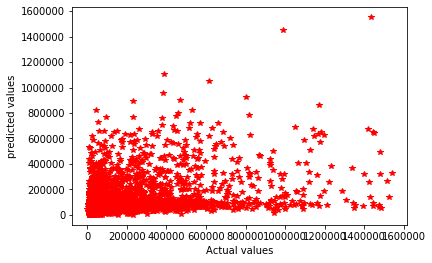

In [40]:
predictions=[]
for pred in estimator.predict(input_fn=test_input_func):
    predictions.append(np.array(pred['predictions']).astype(float))
plt.plot(y_test, predictions, 'r*')
plt.xlabel('Actual values')
plt.ylabel('predicted values')

In [41]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))**0.5
rmse

344.64591177849593

## Regression Model for Not Significant Accidents 

In [42]:
x_data_not_sig = df[df['ACCTYPE']=="Not Significant"][['YEAR4', 'MONTH', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOADF2', 'LOADP2', 'EMPTYF2', 'EMPTYP2','TONS', 'TEMP', 'TRNSPD', 'ACCAUSE', 'TYPE', 'TYPEQ', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'COUNTY']]
y_not_sig = df[df['ACCTYPE']=="Not Significant"][['ACCDMG']]

In [43]:
x_train_not_sig, x_test_not_sig, y_train_not_sig, y_test_not_sig = train_test_split(x_data_not_sig, y_not_sig, test_size=0.3)

In [44]:
#ACCCAUSE
accause_not_sig = tf.feature_column.categorical_column_with_hash_bucket('ACCAUSE',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_not_sig['ACCAUSE'].unique())**0.25))
accause_not_sig=tf.feature_column.embedding_column(accause_not_sig, dimension=embedding_size)

# ACCTYPE
acctype_not_sig = tf.feature_column.categorical_column_with_hash_bucket('TYPE',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_not_sig['TYPE'].unique())**0.25))
acctype_not_sig=tf.feature_column.embedding_column(acctype_not_sig, dimension=embedding_size)

# EQUIPMENT TYPE
typeq_not_sig = tf.feature_column.categorical_column_with_hash_bucket('TYPEQ',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_not_sig['TYPEQ'].unique())**0.25))
typeq_not_sig=tf.feature_column.embedding_column(typeq_not_sig, dimension=embedding_size)

# TRACK TYPE
typtrk_not_sig = tf.feature_column.categorical_column_with_hash_bucket('TYPTRK',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_not_sig['TYPTRK'].unique())**0.25))
typtrk_not_sig=tf.feature_column.embedding_column(typtrk_not_sig, dimension=embedding_size)

# VISISIBILITY
visibility_not_sig = tf.feature_column.categorical_column_with_hash_bucket('VISIBLTY',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_not_sig['VISIBLTY'].unique())**0.25))
visibility_not_sig=tf.feature_column.embedding_column(visibility_not_sig, dimension=embedding_size)

# WEATHER
weather_not_sig = tf.feature_column.categorical_column_with_hash_bucket('WEATHER',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_not_sig['WEATHER'].unique())**0.25))
weather_not_sig=tf.feature_column.embedding_column(weather_not_sig, dimension=embedding_size)

# COUNTY
county_not_sig = tf.feature_column.categorical_column_with_hash_bucket('COUNTY',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_not_sig['COUNTY'].unique())**0.25))
county_not_sig=tf.feature_column.embedding_column(county_not_sig, dimension=embedding_size)

feature_col =[year, month, trnspd, typeq_not_sig, loadf1, loadp1, emptyf1, emptyp1, loadf2, loadp2, emptyf2, emptyp2, typtrk_not_sig, acctype_not_sig, accause_not_sig, visibility_not_sig, weather_not_sig, temp, county_not_sig]

In [46]:
input_func_not_sig= tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train_not_sig, 
                                                y= y_train_not_sig, 
                                                batch_size=10, 
                                                num_epochs=1000, 
                                                shuffle=True)

test_input_func_not_sig = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test_not_sig,                                                   
                                                 batch_size=100, 
                                                 num_epochs=1, 
                                                 shuffle=False)

eval_input_func_not_sig = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test_not_sig,
                                                      y=y_test_not_sig, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)

estimator_not_sig = tf.estimator.DNNRegressor(hidden_units=[9,9,3], feature_columns=feature_col, optimizer=lambda: tf.optimizers.Adam(
        learning_rate=0.01))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmpop4v39sq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a4cc60190>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [47]:
#estimator_not_sig.train(input_fn=input_func_not_sig, max_steps=50000)

In [48]:
#result_eval_not_sig = estimator.evaluate(input_fn=eval_input_func_not_sig)
#result_eval_not_sig

In [49]:
#predictions_not_sig=[]
#for pred in estimator.predict(input_fn=test_input_func_ser):
#    predictions_not_sig.append(np.array(pred['predictions']).astype(float))
#plt.plot(y_test_not_sig, predictions_not_sig, 'r*')
#plt.xlabel('Actual values')
#plt.ylabel('predicted values')

In [50]:
#rmse_not_sig = np.sqrt(mean_squared_error(y_test_not_sig, predictions_not_sig))**0.5
#rmse_not_sig

## Regression Model for Significant Accidents 

In [51]:
x_data_sig = df[df['ACCTYPE']=="Significant"][['YEAR4', 'MONTH', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOADF2', 'LOADP2', 'EMPTYF2', 'EMPTYP2','TONS', 'TEMP', 'TRNSPD', 'ACCAUSE', 'TYPE', 'TYPEQ', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'COUNTY']]
y_sig = df[df['ACCTYPE']=="Significant"][['ACCDMG']]

In [52]:
x_train_sig, x_test_sig, y_train_sig, y_test_sig = train_test_split(x_data_sig, y_sig, test_size=0.3)

In [53]:
#ACCCAUSE
accause = tf.feature_column.categorical_column_with_hash_bucket('ACCAUSE',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_sig['ACCAUSE'].unique())**0.25))
accause=tf.feature_column.embedding_column(accause, dimension=embedding_size)

# ACCTYPE
acctype = tf.feature_column.categorical_column_with_hash_bucket('TYPE',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_sig['TYPE'].unique())**0.25))
acctype=tf.feature_column.embedding_column(acctype, dimension=embedding_size)

# EQUIPMENT TYPE
typeq = tf.feature_column.categorical_column_with_hash_bucket('TYPEQ',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_sig['TYPEQ'].unique())**0.25))
typeq=tf.feature_column.embedding_column(typeq, dimension=embedding_size)

# TRACK TYPE
typtrk = tf.feature_column.categorical_column_with_hash_bucket('TYPTRK',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_sig['TYPTRK'].unique())**0.25))
typtrk=tf.feature_column.embedding_column(typtrk, dimension=embedding_size)

# VISISIBILITY
visibility = tf.feature_column.categorical_column_with_hash_bucket('VISIBLTY',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_sig['VISIBLTY'].unique())**0.25))
visibility=tf.feature_column.embedding_column(visibility, dimension=embedding_size)

# WEATHER
weather = tf.feature_column.categorical_column_with_hash_bucket('WEATHER',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_sig['WEATHER'].unique())**0.25))
weather=tf.feature_column.embedding_column(weather, dimension=embedding_size)

# COUNTY
county = tf.feature_column.categorical_column_with_hash_bucket('COUNTY',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_sig['COUNTY'].unique())**0.25))
county=tf.feature_column.embedding_column(county, dimension=embedding_size)

feature_col =[year, month, trnspd, typeq, loadf1, loadp1, emptyf1, emptyp1, loadf2, loadp2, emptyf2, emptyp2, typtrk, acctype, accause, visibility, weather, temp, county]

In [54]:
input_func_sig= tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train_sig, 
                                                y= y_train_sig, 
                                                batch_size=10, 
                                                num_epochs=1000, 
                                                shuffle=True)

test_input_func_sig = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test_sig,                                                   
                                                 batch_size=100, 
                                                 num_epochs=1, 
                                                 shuffle=False)

eval_input_func_sig = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test_sig,
                                                      y=y_test_sig, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)

estimator_sig = tf.estimator.DNNRegressor(hidden_units=[9,9,3], feature_columns=feature_col, optimizer=lambda: tf.optimizers.Adam(
        learning_rate=0.01))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmp0ak8fri0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a4c28ce90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [55]:
#estimator_sig.train(input_fn=input_func_sig, max_steps=50000)

In [56]:
#result_eval_sig = estimator.evaluate(input_fn=eval_input_func_sig)
#result_eval_sig

In [57]:
#predictions_sig=[]
#for pred in estimator.predict(input_fn=test_input_func_ser):
#    predictions_sig.append(np.array(pred['predictions']).astype(float))
#plt.plot(y_test_sig, predictions_sig, 'r*')
#plt.xlabel('Actual values')
#plt.ylabel('predicted values')

In [58]:
#rmse_sig = np.sqrt(mean_squared_error(y_test_sig, predictions_sig))**0.5
#rmse_sig

## Regression Model for Serious Accidents 

In [59]:
x_data_ser = df[df['ACCTYPE']=="Serious"][['YEAR4', 'MONTH', 'LOADF1', 'LOADP1', 'EMPTYF1', 'EMPTYP1','LOADF2', 'LOADP2', 'EMPTYF2', 'EMPTYP2','TONS', 'TEMP', 'TRNSPD', 'ACCAUSE', 'TYPE', 'TYPEQ', 'TYPTRK', 'VISIBLTY', 'WEATHER', 'COUNTY']]
y_ser = df[df['ACCTYPE']=="Serious"][['ACCDMG']]

In [60]:
x_train_ser, x_test_ser, y_train_ser, y_test_ser = train_test_split(x_data_ser, y_ser, test_size=0.3)

In [61]:
#ACCCAUSE
accause = tf.feature_column.categorical_column_with_hash_bucket('ACCAUSE',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_ser['ACCAUSE'].unique())**0.25))
accause=tf.feature_column.embedding_column(accause, dimension=embedding_size)

# ACCTYPE
acctype = tf.feature_column.categorical_column_with_hash_bucket('TYPE',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_ser['TYPE'].unique())**0.25))
acctype=tf.feature_column.embedding_column(acctype, dimension=embedding_size)

# EQUIPMENT TYPE
typeq = tf.feature_column.categorical_column_with_hash_bucket('TYPEQ',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_ser['TYPEQ'].unique())**0.25))
typeq=tf.feature_column.embedding_column(typeq, dimension=embedding_size)

# TRACK TYPE
typtrk = tf.feature_column.categorical_column_with_hash_bucket('TYPTRK',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_ser['TYPTRK'].unique())**0.25))
typtrk=tf.feature_column.embedding_column(typtrk, dimension=embedding_size)

# VISISIBILITY
visibility = tf.feature_column.categorical_column_with_hash_bucket('VISIBLTY',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_ser['VISIBLTY'].unique())**0.25))
visibility=tf.feature_column.embedding_column(visibility, dimension=embedding_size)

# WEATHER
weather = tf.feature_column.categorical_column_with_hash_bucket('WEATHER',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_ser['WEATHER'].unique())**0.25))
weather=tf.feature_column.embedding_column(weather, dimension=embedding_size)

# COUNTY
county = tf.feature_column.categorical_column_with_hash_bucket('COUNTY',hash_bucket_size=10000)

embedding_size = int(math.floor(len(x_data_ser['COUNTY'].unique())**0.25))
county=tf.feature_column.embedding_column(county, dimension=embedding_size)

feature_col =[year, month, trnspd, typeq, loadf1, loadp1, emptyf1, emptyp1, loadf2, loadp2, emptyf2, emptyp2, typtrk, acctype, accause, visibility, weather, temp, county]

In [62]:
input_func_ser= tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train_ser, 
                                                y= y_train_ser, 
                                                batch_size=10, 
                                                num_epochs=1000, 
                                                shuffle=True)

test_input_func_ser = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test_ser,                                                   
                                                 batch_size=100, 
                                                 num_epochs=1, 
                                                 shuffle=False)

eval_input_func_ser = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test_ser,
                                                      y=y_test_ser, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)

estimator_ser = tf.estimator.DNNRegressor(hidden_units=[9,9,3], feature_columns=feature_col, optimizer=lambda: tf.optimizers.Adam(
        learning_rate=0.01))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/4y/xfd9r0rd0jz001c3ts8044dr0000gn/T/tmpx4yygyit', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a50f29f90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [63]:
#estimator_ser.train(input_fn=input_func_ser, max_steps=50000)

In [64]:
#result_eval_ser = estimator.evaluate(input_fn=eval_input_func_ser)
#result_eval_ser

In [65]:
#predictions_ser=[]
#for pred in estimator.predict(input_fn=test_input_func_ser):
#    predictions_ser.append(np.array(pred['predictions']).astype(float))
#plt.plot(y_test_ser, predictions_ser, 'r*')
#plt.xlabel('Actual values')
#plt.ylabel('predicted values')

In [66]:
#rmse_ser = np.sqrt(mean_squared_error(y_test_ser, predictions_ser))**0.5
#rmse_ser